In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import sympy  as sp
import numpy  as np
import mpmath as mp
import numpy  as np
import matplotlib.pyplot as plt
import os

from scipy.stats import wasserstein_distance
from scipy.signal import find_peaks

In [52]:
theta0 = 45 * (np.pi / 3.14) 
omega0 = 0.0 
dt = 0.001

L = 1
m = 1
g = 9.80665

# DADOS REAIS

In [53]:
tables  = [os.path.join('files', file) for file in os.listdir('files') if '.csv' in file]
indexes = sorted([int(tab.replace('.', '_').split('_')[-2]) for tab in tables])
files   = [os.path.join('files', f'test_{i}.csv') for i in indexes]

df   = pd.DataFrame()
time = 0.00

for path in files:
    data = pd.read_csv(path)
    data["time"] = (data.time.values - data.time.values[0]) + time

    df   = pd.concat([df, data], axis=0)
    time = df.time.max()

df

,wy,ay,yaw,wx,time,az,wz,pitch,ax,roll
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.010000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,0.0,0.0,0.0
3,-1.0,135.0,0.0,0.0,0.480000,-6.0,0.0,0.0,-479.0,0.0
4,-1.0,135.0,0.0,0.0,0.480000,-6.0,0.0,0.0,-479.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10359,10.0,78.0,33886.0,-2.0,113.799997,-294.0,4.0,902.0,-394.0,12696.0
10360,9.0,78.0,33886.0,0.0,113.809999,-294.0,3.0,902.0,-394.0,12696.0
10361,9.0,78.0,33886.0,-1.0,113.820001,-294.0,4.0,902.0,-394.0,12697.0
10362,13.0,78.0,33888.0,1.0,113.900003,-295.0,5.0,905.0,-394.0,12706.0


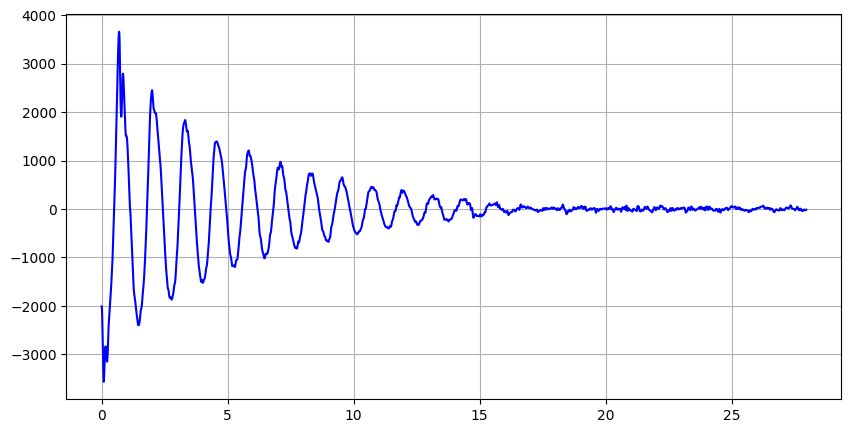

In [54]:
target = df.loc[(df.time > 72) & (df.time < 100)].copy()
target['time'] = target.time.values - target.time.values[0]

plt.figure(figsize=(10, 5))
plt.plot(target.time, target.wz, color='blue')
plt.grid()

KeyError: '[5, 9, 11, 15, 20, 26, 30, 39, 47, 49, 58, 61, 63, 71, 75, 77, 80, 83, 86, 92, 97, 100, 103, 106, 111, 116, 122, 126, 135, 141, 143, 145, 154, 156, 161, 169, 172, 177, 180, 182, 184, 190, 196, 198, 200, 204, 207, 209, 215, 219, 221, 223, 226, 231, 234, 242, 244, 247, 252, 257, 259, 262, 270, 276, 282, 286, 289, 292, 298, 300, 303, 305, 312, 320, 327, 330, 335, 338, 343, 347, 350, 352, 355, 362, 368, 380, 385, 388, 391, 395, 398, 400, 406, 409, 413, 419, 430, 433, 436, 438, 440, 442, 446, 454, 458, 460, 470, 476, 478, 481, 483, 487, 494, 497, 500, 502, 505, 508, 517, 521, 533, 536, 538, 546, 550, 560, 565, 572, 575, 591, 602, 607, 612, 616, 618, 625, 636, 644, 649, 651, 653, 655, 659, 677, 684, 690, 693, 698, 708, 710, 713, 717, 720, 724, 728, 733, 736, 748, 753, 757, 763, 769, 775, 785, 789, 792, 795, 797, 801, 803, 815, 818, 823, 825, 827, 837, 847, 850, 856, 859, 869, 871, 878, 880, 885, 889, 895, 897, 901, 906, 909, 911, 917, 923, 927, 931, 938, 950, 953, 955, 958, 962, 969, 977, 985, 991, 999, 1003, 1006, 1017, 1021, 1025, 1027, 1031, 1033, 1035, 1038, 1040, 1046, 1050, 1055, 1065, 1070, 1075, 1078, 1083, 1086, 1092, 1097, 1102, 1120, 1127, 1129, 1132, 1136, 1140, 1149, 1155, 1157, 1166, 1172, 1174, 1179, 1186, 1188, 1198, 1204, 1209, 1217, 1226, 1228, 1236, 1238, 1255, 1262, 1265, 1271, 1276, 1283, 1288, 1295, 1300, 1307, 1313, 1316, 1318, 1320, 1322, 1324, 1330, 1333, 1344, 1350, 1356, 1358, 1363, 1367, 1369, 1375, 1380, 1385, 1400, 1402, 1406, 1412, 1417, 1420, 1429, 1434, 1437, 1442, 1448, 1450, 1455, 1458, 1462, 1465, 1471, 1473, 1479, 1487, 1502, 1507, 1515, 1517, 1523, 1527, 1529, 1531, 1534, 1540, 1545, 1554, 1564, 1566, 1569, 1576, 1580, 1589, 1592, 1596, 1602, 1606, 1609, 1615, 1620, 1623, 1630, 1633, 1639, 1647, 1650, 1655, 1658, 1662, 1668, 1675, 1678, 1682, 1686, 1688, 1690, 1693, 1702, 1707, 1713, 1716, 1720, 1733, 1737, 1741, 1743, 1755, 1759, 1766, 1770, 1776, 1780, 1786, 1789, 1798, 1801, 1827, 1833, 1839, 1842, 1846, 1849, 1862, 1864, 1867, 1875, 1877, 1883, 1888, 1891, 1893, 1895, 1907, 1913, 1919, 1922, 1926, 1928, 1930, 1939, 1942, 1950, 1953, 1957, 1963, 1965, 1969, 1975, 1979, 1983, 1985, 1987, 1990, 1992, 1995, 1998, 2002, 2015, 2017, 2020, 2025, 2027, 2037, 2040, 2048, 2053, 2060, 2069, 2079, 2083, 2086, 2088, 2091, 2093, 2097, 2104, 2110, 2112, 2116, 2118, 2121, 2123, 2126, 2130, 2133, 2137, 2140, 2144, 2150, 2154, 2161, 2169, 2175, 2181, 2184, 2191, 2198, 2201, 2203, 2205, 2207, 2212, 2215, 2218, 2231, 2237, 2244, 2247, 2250, 2260, 2262, 2269, 2272, 2276, 2278, 2284, 2288, 2290, 2293, 2295, 2299, 2301, 2305, 2309, 2315, 2319, 2323, 2328, 2332, 2337, 2346, 2349, 2353, 2355, 2359, 2364, 2371, 2379, 2381, 2384, 2391, 2398, 2404, 2406, 2414, 2420, 2424, 2437, 2442, 2451, 2457, 2463, 2467, 2478, 2481, 2484, 2490, 2496, 2501, 2516, 2518, 2520, 2531, 2536, 2543, 2553, 2558, 2560, 2562, 2568, 2571, 2577, 2579, 2585, 2587, 2590, 2596, 2600, 2606, 2612, 2616, 2618, 2621, 2626, 2644, 2646, 2649, 2654, 2658, 2661, 2663, 2667, 2680, 2684, 2689, 2693, 2697, 2700, 2709, 2715, 2720, 2722, 2725, 2735, 2737, 2739, 2751, 2759, 2772, 2781, 2789, 2793, 2798, 2800, 2809, 2815, 2823, 2828, 2835, 2839, 2841, 2846, 2848, 2851, 2857, 2862, 2869, 2874, 2886, 2888, 2890, 2896, 2899, 2904, 2909, 2915, 2917, 2921, 2924, 2926, 2933, 2935, 2942, 2948, 2954, 2959, 2964, 2970, 2978, 2980, 2983, 2989, 2993, 3007, 3014, 3016, 3019, 3021, 3023, 3026, 3029, 3031, 3039, 3043, 3049, 3055, 3059, 3065, 3067, 3069, 3075, 3081, 3083, 3086, 3097, 3099, 3101, 3104, 3107, 3109, 3114, 3116, 3122, 3124, 3130, 3136, 3148, 3152, 3160, 3163, 3169, 3174, 3177, 3181, 3184, 3188, 3193, 3204, 3209, 3211, 3213, 3217, 3220, 3224, 3240, 3243, 3249, 3252, 3256, 3263, 3265, 3267, 3269, 3274, 3277, 3281, 3284, 3291, 3293, 3297, 3302, 3305, 3308, 3313, 3315, 3319, 3321, 3323, 3326, 3334, 3336, 3342, 3347, 3349, 3357, 3361, 3363, 3367, 3376, 3383, 3388, 3392, 3395, 3398, 3405, 3411, 3414, 3419, 3425, 3438, 3444, 3451, 3457, 3466, 3468, 3473, 3478, 3481, 3486, 3489, 3496, 3498, 3500, 3504, 3507, 3509, 3513, 3515, 3521, 3533, 3548, 3554, 3559, 3571, 3574, 3582, 3585, 3588, 3597, 3609, 3612, 3618, 3620, 3624, 3628, 3634, 3637, 3640, 3649, 3655, 3669, 3671, 3675, 3679, 3683, 3689, 3691, 3698, 3704, 3707, 3724, 3730, 3735, 3738, 3742, 3750, 3754, 3757, 3759, 3762, 3764, 3779, 3782, 3790, 3795, 3797, 3800, 3807, 3810, 3812, 3814, 3825, 3831, 3838, 3858, 3861, 3863, 3875, 3878, 3884, 3892, 3894, 3897, 3903, 3911, 3914, 3917, 3921, 3926, 3937, 3941, 3949, 3952, 3957, 3961, 3967, 3970, 3973, 3981, 3987, 3989, 4000, 4006, 4010, 4014, 4016, 4018, 4020, 4024, 4027, 4029, 4032, 4039, 4041, 4045, 4047, 4062, 4067, 4072, 4086, 4098, 4102, 4105, 4107, 4114, 4121, 4129, 4132, 4135, 4142, 4158, 4160, 4162, 4166, 4169, 4172, 4180, 4182, 4186, 4192, 4197, 4201, 4206, 4214, 4217, 4227, 4230, 4232, 4238, 4241, 4250, 4254, 4261, 4263, 4266, 4268, 4273, 4276, 4278, 4283, 4287, 4291, 4300, 4303, 4305, 4315, 4320, 4325, 4331, 4333, 4335, 4339, 4342, 4346, 4350, 4358, 4362, 4364, 4367, 4374, 4376, 4379, 4395, 4401, 4405, 4424, 4427, 4431, 4438, 4440, 4445, 4447, 4451, 4453, 4458, 4467, 4472, 4475, 4478, 4482, 4488, 4502, 4510, 4514, 4517, 4519, 4524, 4527, 4529, 4539, 4546, 4549, 4551, 4553, 4556, 4558, 4561, 4563, 4566, 4568, 4571, 4578, 4580, 4583, 4585, 4594, 4596, 4599, 4607, 4609, 4611, 4613, 4616, 4618, 4622, 4627, 4629, 4632, 4636, 4642, 4647, 4656, 4659, 4662, 4665, 4668, 4672, 4681, 4683, 4686, 4690, 4692, 4694, 4696, 4698, 4705, 4711, 4714, 4722, 4725, 4729, 4733, 4748, 4753, 4760, 4763, 4768, 4774, 4776, 4784, 4788, 4790, 4798, 4802, 4808, 4814, 4816, 4825, 4828, 4831, 4837, 4844, 4848, 4854, 4859, 4873, 4876, 4878, 4883, 4888, 4892, 4896, 4901, 4907, 4910, 4916, 4921, 4925, 4927, 4933, 4939, 4942, 4953, 4963, 4965, 4968, 4974, 4981, 4987, 4990, 4992, 4994, 5001, 5008, 5013, 5015, 5019, 5022, 5030, 5033, 5037, 5039, 5044, 5048, 5050, 5058, 5063, 5067, 5074, 5076, 5078, 5083, 5085, 5095, 5100, 5103, 5105, 5107, 5110, 5118, 5120, 5133, 5139, 5143, 5149, 5159, 5161, 5166, 5168, 5171, 5173, 5175, 5185, 5191, 5195, 5198, 5203, 5206, 5211, 5216, 5224, 5232, 5238, 5244, 5248, 5250, 5257, 5262, 5265, 5268, 5270, 5272, 5275, 5278, 5283, 5286, 5290, 5292, 5294, 5297, 5310, 5312, 5317, 5322, 5325, 5327, 5330, 5337, 5343, 5356, 5360, 5375, 5378, 5385, 5389, 5397, 5402, 5414, 5417, 5420, 5423, 5429, 5436, 5438, 5441, 5446, 5448, 5459, 5465, 5469, 5473, 5480, 5491, 5496, 5500, 5505, 5508, 5512, 5514, 5517, 5534, 5539, 5541, 5547, 5549, 5554, 5558, 5561, 5569, 5574, 5579, 5581, 5584, 5586, 5590, 5593, 5595, 5599, 5601, 5608, 5612, 5620, 5627, 5630, 5633, 5636, 5641, 5648, 5653, 5660, 5668, 5673, 5677, 5680, 5684, 5687, 5691, 5694, 5701, 5705, 5707, 5710, 5716, 5720, 5728, 5735, 5738, 5741, 5746, 5748, 5753, 5757, 5760, 5763, 5769, 5771, 5776, 5782, 5789, 5794, 5797, 5813, 5815, 5822, 5832, 5837, 5839, 5845, 5850, 5856, 5860, 5863, 5865, 5874, 5877, 5880, 5890, 5893, 5897, 5901, 5915, 5939, 5956, 5961, 5985, 5989, 5995, 6003, 6012, 6021, 6036, 6043, 6050, 6062, 6080, 6097, 6109, 6118, 6131, 6136, 6149, 6172, 6184, 6200, 6230, 6245, 6249, 6306, 6316, 6326, 6338, 6345, 6360, 6383, 6398, 6404, 6412, 6425, 6444, 6465, 6477, 6488, 6500, 6507, 6519, 6529, 6536, 6550, 6557, 6566, 6570, 6598, 9139, 9145, 9160, 9174, 9196, 9210, 9223, 9235, 9251, 9285, 9309, 9344, 9357, 9364, 9373, 9398, 9408, 9418, 9424, 9433, 9436, 9438, 9440, 9444, 9448, 9489, 9525, 9534, 9540, 9546, 9552, 9558, 9578, 9583, 9596, 9598, 9600, 9612, 9615, 9618, 9625, 9628, 9630, 9635, 9640, 9652, 9664, 9670, 9679, 9683, 9692, 9708, 9715, 9721, 9732, 9737, 9754, 9756, 9764, 9770, 9773, 9780, 9786, 9792, 9794, 9799, 9809, 9811, 9814, 9818, 9820, 9826, 9831, 9837, 9842, 9851, 9858, 9862, 9866, 9881, 9883, 9889, 9896, 9899, 9902, 9906, 9912, 9919, 9938, 9946, 9954, 9957, 9962, 9968, 9971, 9976, 9978, 9987, 9992, 9998, 10005, 10010, 10021, 10024, 10033, 10038, 10041, 10049, 10054, 10058, 10065, 10072, 10078, 10086, 10098, 10104, 10115, 10118, 10127, 10132, 10136, 10142, 10147, 10152, 10158, 10165, 10168, 10171, 10176, 10181, 10186, 10193, 10202, 10209, 10211, 10216, 10220, 10224, 10231, 10242, 10248, 10260, 10263, 10276, 10278, 10284, 10296, 10298, 10302, 10307, 10314, 10325, 10327, 10331, 10340, 10345, 10352, 10359, 10362] not in index'

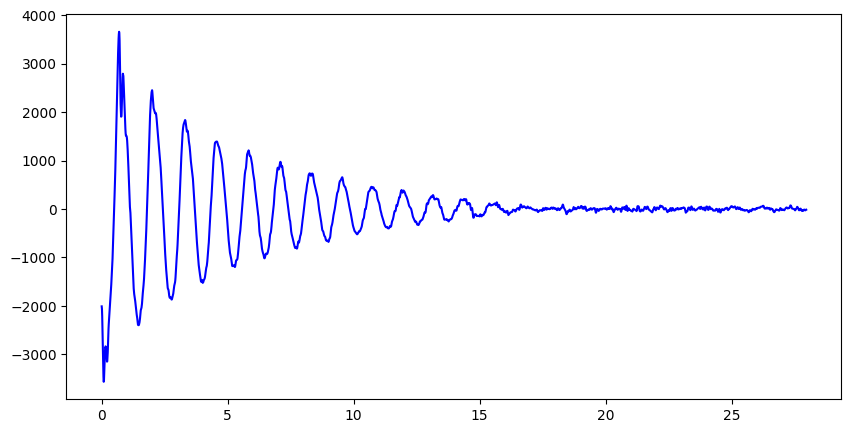

In [ ]:
import numpy as np
from scipy.signal import find_peaks

peaks, properties = find_peaks(df.wz, height=0)
peak_heights      = properties['peak_heights']

plt.figure(figsize=(10, 5))
plt.plot(target.time, target.wz, color='blue')
plt.scatter(target.time.iloc[peaks], target.wz.iloc[peaks], color='red', marker='x')
plt.grid()

In [ ]:
# 1. Pegar amplitude inicial (max)
A0 = np.max(peak_heights)

# 2. Definir threshold (4%)
threshold = A0 * 0.04

# 3. Contar picos acima do threshold
Q = np.sum(peak_heights > threshold)
Q

np.int64(51)

### Com Atrito
$$\ddot{\theta} + \alpha\cdot\dot{\theta} + \frac{g}{L}\cdot sin(\theta) = 0$$

Como achar $\alpha$ experimentalmente?

- $\alpha = \frac{1}{Q} \cdot \sqrt{\frac{g}{L}}$ 
- $Q$ é o numero de vezes que o pendulo oscila (vai e volta até a posição inicial) até parar (chegar a $\approx$ 4% da sua amplitude inicial)

In [ ]:
alpha = float(1/Q * mp.sqrt(g/L))
alpha

0.061403080797391554

In [ ]:
def edo(t, y):
    theta, omega = y
    return [omega, - (alpha)*omega - (g/L)*mp.sin(theta)]

f = mp.odefun(edo, 0.0, [theta0, omega0])
f

<function mpmath.calculus.odes.odefun.<locals>.interpolant(x)>

# IMPLEMENTAÇÃO

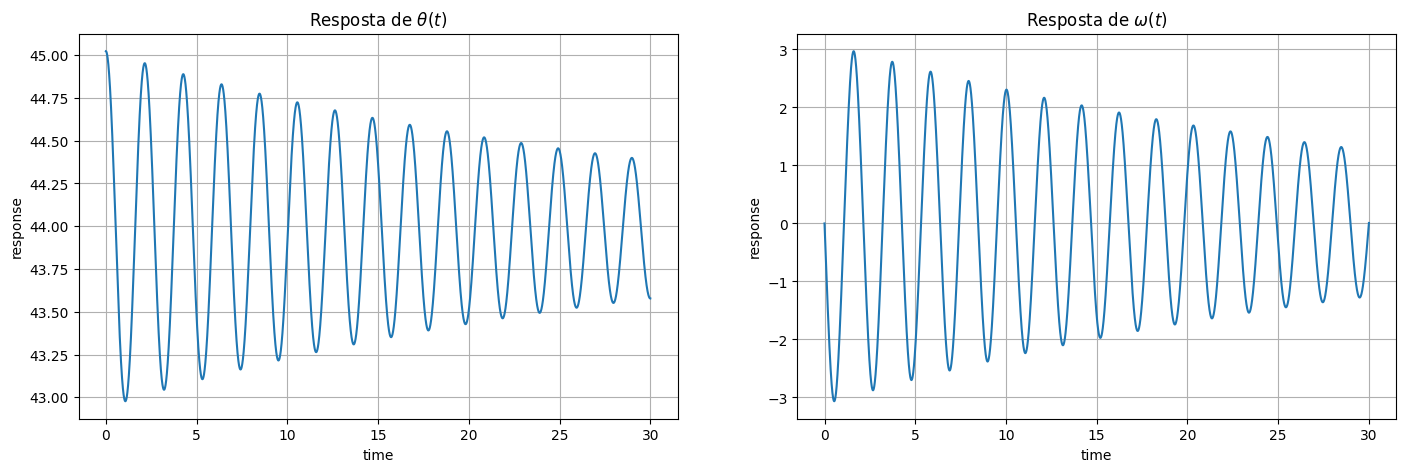

In [ ]:
time     = np.arange(0, 30, dt)
response = [f(t) for t in time]
theta = np.array([float(theta) for (theta, omega) in response])
omega = np.array([float(omega) for (theta, omega) in response])

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(time, theta)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $\theta(t)$')
plt.subplot(1, 2, 2)
plt.plot(time, omega)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $\omega(t)$')
plt.show()

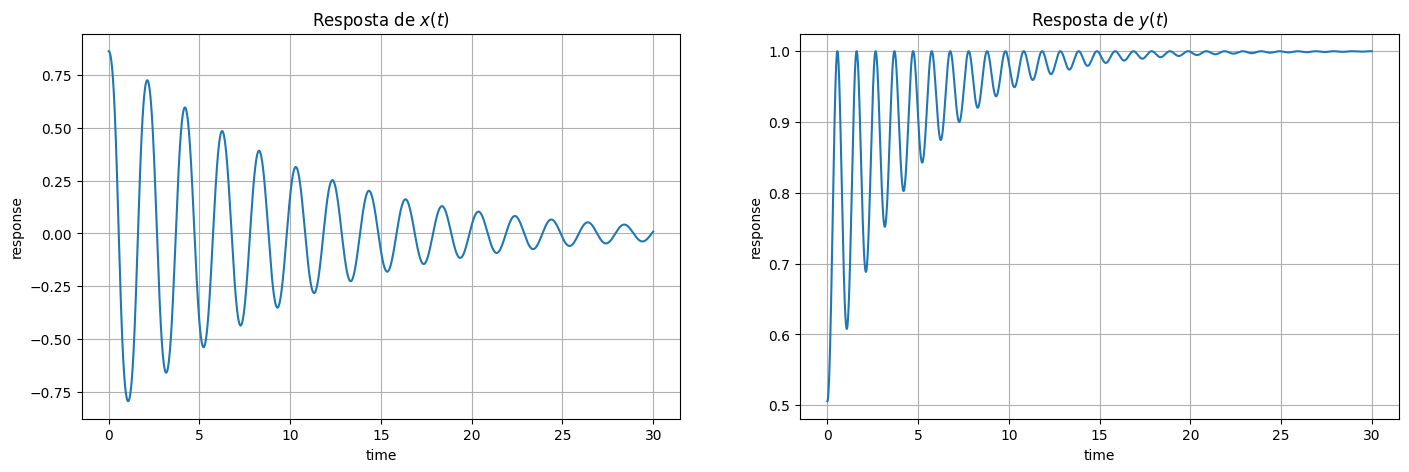

In [ ]:
x = L * np.sin(theta)
y = L * np.cos(theta)

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(time, x)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $x(t)$')
plt.subplot(1, 2, 2)
plt.plot(time, y)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $y(t)$')
plt.show()

In [ ]:
df = pd.DataFrame({
    'time': time,
    'theta': theta,
    'omega': omega,
    'x': x,
    'y': y
})

df

,time,theta,omega,x,y
0,0.000,45.022825,0.000000,0.862671,0.505765
1,0.001,45.022820,-0.008459,0.862669,0.505769
2,0.002,45.022808,-0.016916,0.862663,0.505780
3,0.003,45.022787,-0.025371,0.862652,0.505798
4,0.004,45.022757,-0.033824,0.862637,0.505824
...,...,...,...,...,...
29995,29.995,43.990458,0.106682,0.008161,0.999967
29996,29.996,43.990565,0.106577,0.008268,0.999966
29997,29.997,43.990671,0.106472,0.008374,0.999965
29998,29.998,43.990778,0.106365,0.008481,0.999964


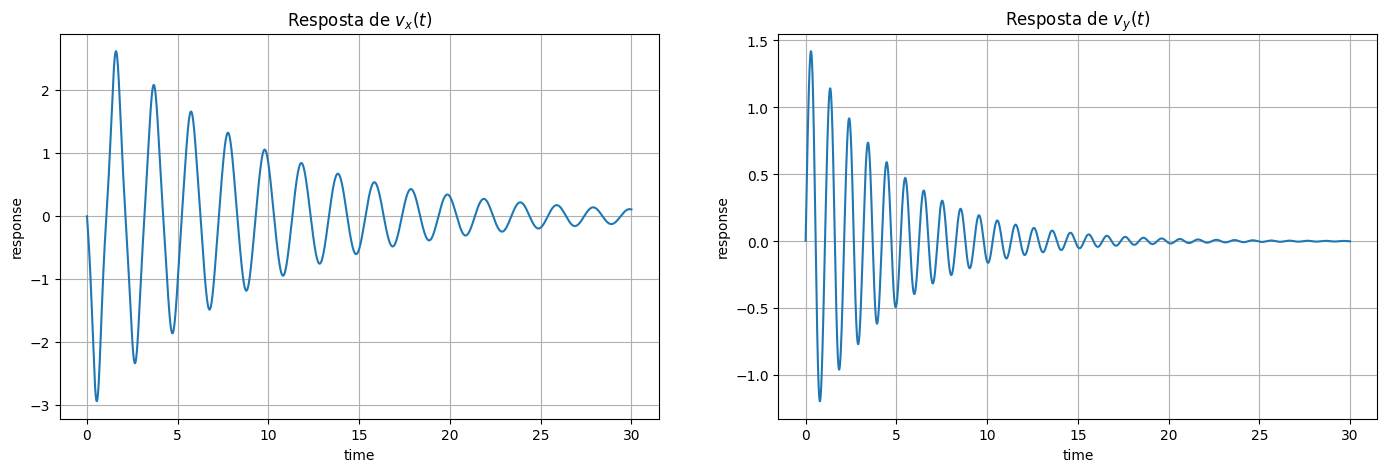

In [ ]:
df['vx'] = np.gradient(df.x, dt)
df['vy'] = np.gradient(df.y, dt)

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(df.time, df.vx)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $v_x(t)$')
plt.subplot(1, 2, 2)
plt.plot(df.time, df.vy)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $v_y(t)$')
plt.show()

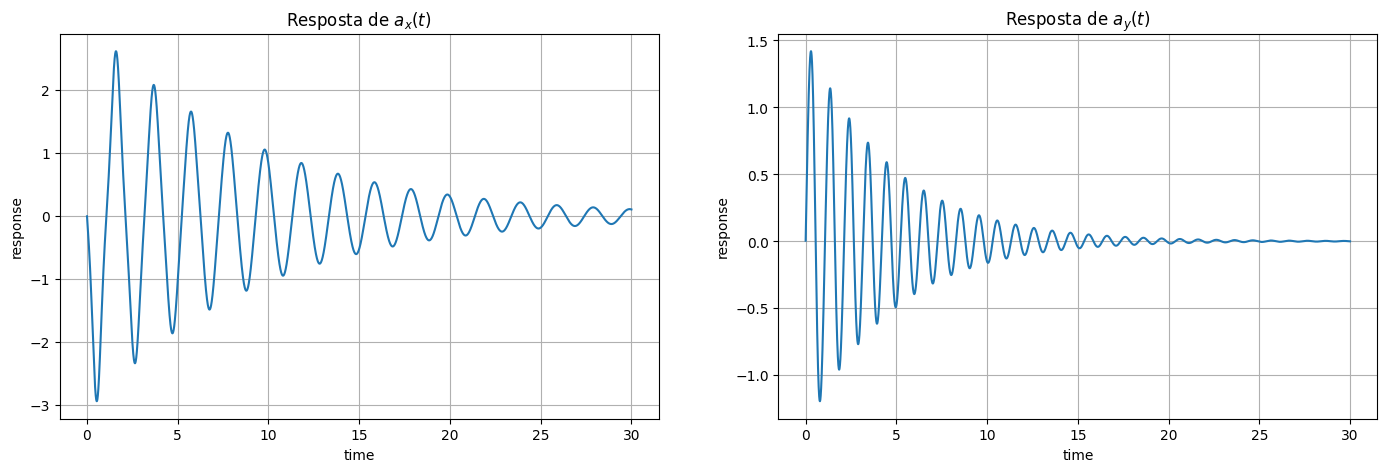

In [ ]:
df['ax'] = np.gradient(df.x, dt)
df['ay'] = np.gradient(df.y, dt)

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(df.time, df.vx)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $a_x(t)$')
plt.subplot(1, 2, 2)
plt.plot(df.time, df.vy)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $a_y(t)$')
plt.show()

In [ ]:
pendulum = df.copy()
pendulum.to_csv('files/Modeling.csv', index=None)
pendulum

,time,theta,omega,x,y,vx,vy,ax,ay
0,0.000,45.022825,0.000000,0.862671,0.505765,-0.002139,0.003649,-0.002139,0.003649
1,0.001,45.022820,-0.008459,0.862669,0.505769,-0.004278,0.007297,-0.004278,0.007297
2,0.002,45.022808,-0.016916,0.862663,0.505780,-0.008556,0.014592,-0.008556,0.014592
3,0.003,45.022787,-0.025371,0.862652,0.505798,-0.012833,0.021886,-0.012833,0.021886
4,0.004,45.022757,-0.033824,0.862637,0.505824,-0.017109,0.029178,-0.017109,0.029178
...,...,...,...,...,...,...,...,...,...
29995,29.995,43.990458,0.106682,0.008161,0.999967,0.106678,-0.000871,0.106678,-0.000871
29996,29.996,43.990565,0.106577,0.008268,0.999966,0.106574,-0.000881,0.106574,-0.000881
29997,29.997,43.990671,0.106472,0.008374,0.999965,0.106468,-0.000892,0.106468,-0.000892
29998,29.998,43.990778,0.106365,0.008481,0.999964,0.106361,-0.000902,0.106361,-0.000902


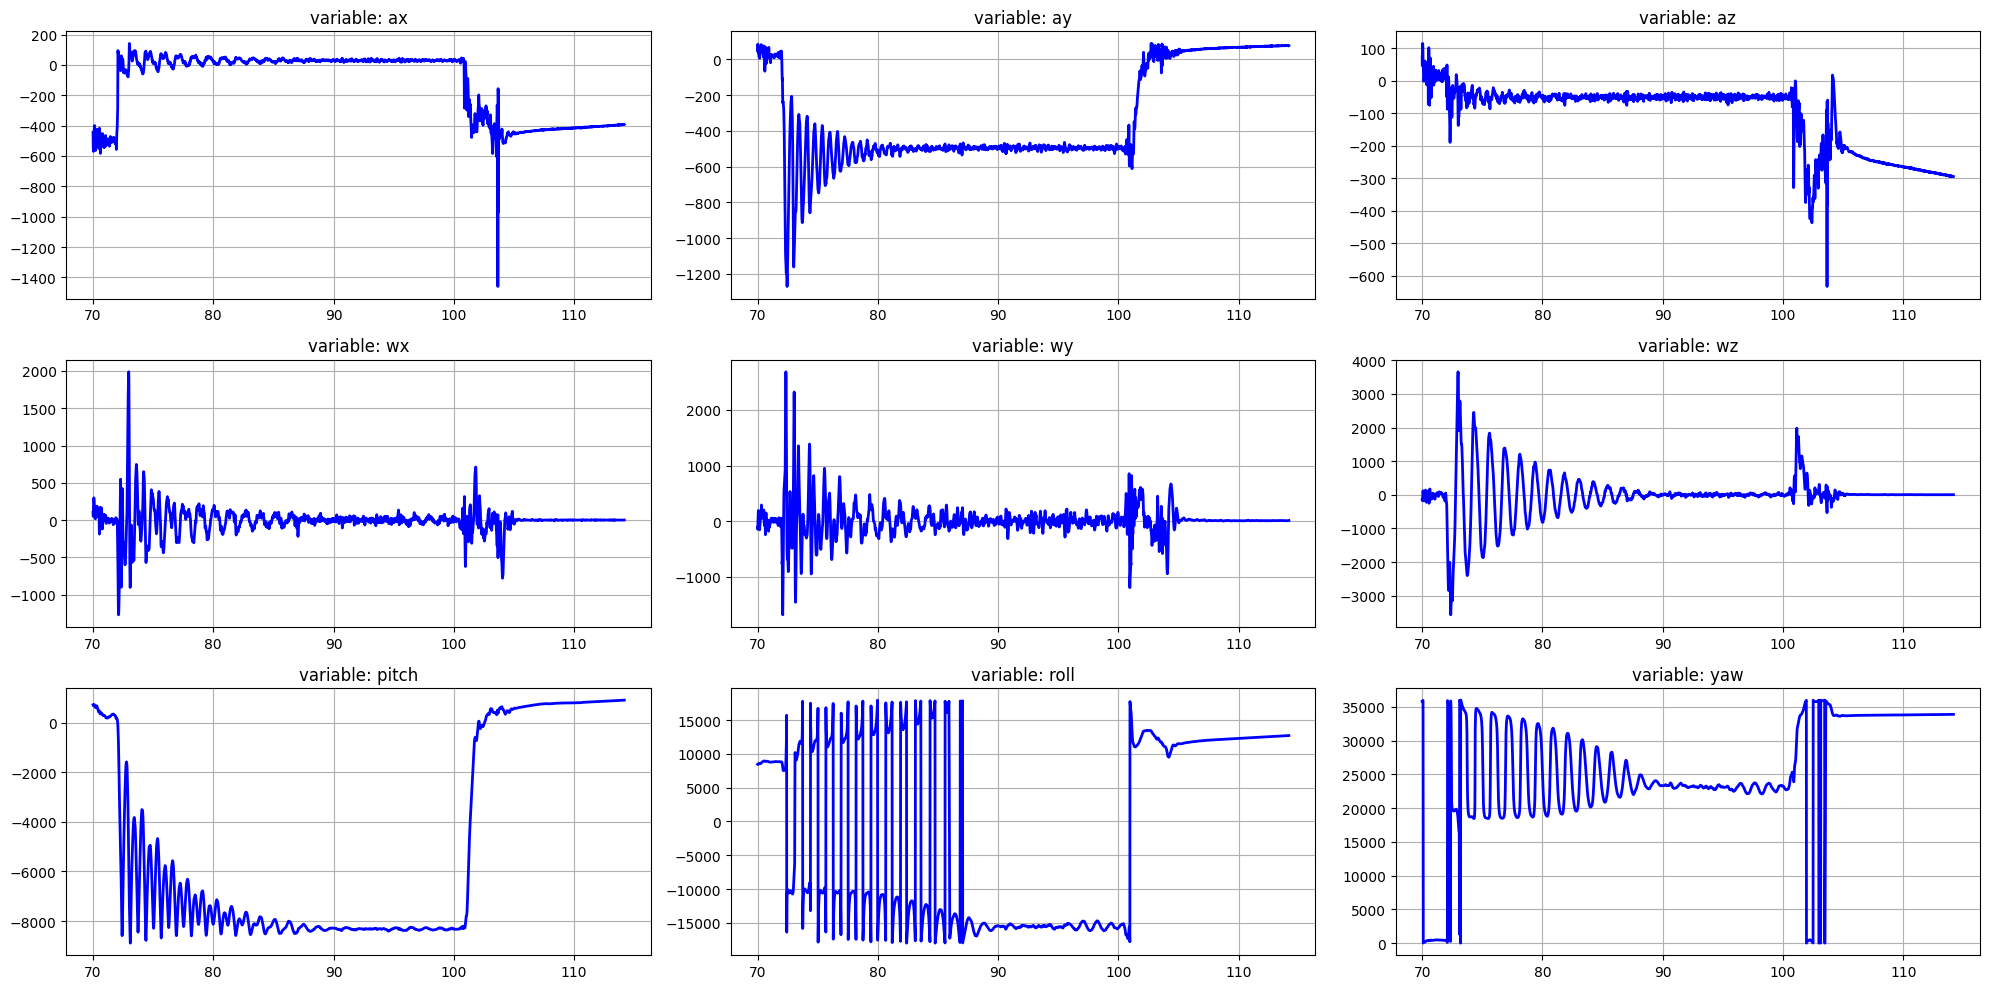

In [ ]:
plotAll(df, limits=(70, None))

In [ ]:
sensor = df.loc[(df.time > 70) & (df.time < 90)].copy()
target = 'wz'

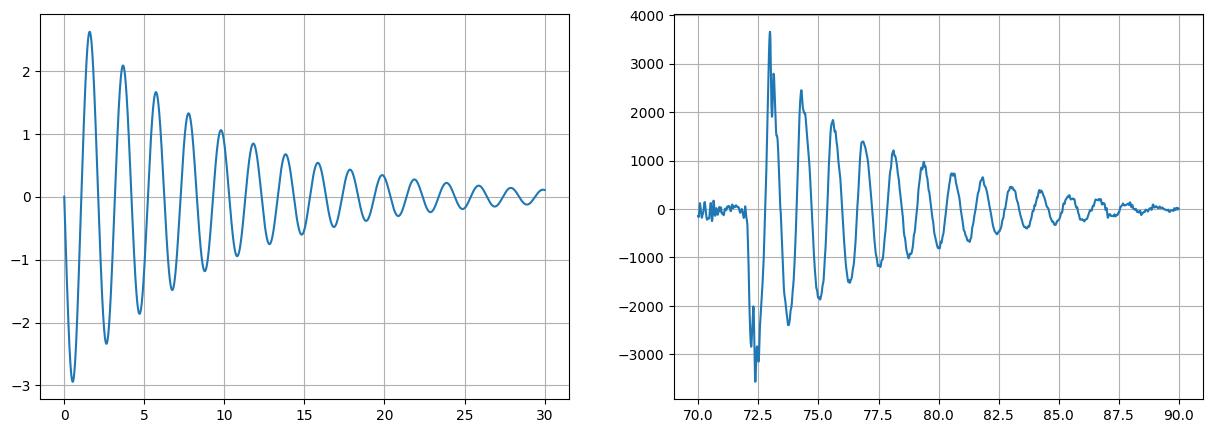

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(pendulum.time, pendulum.omega)
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(sensor.time, sensor[target])
plt.grid()

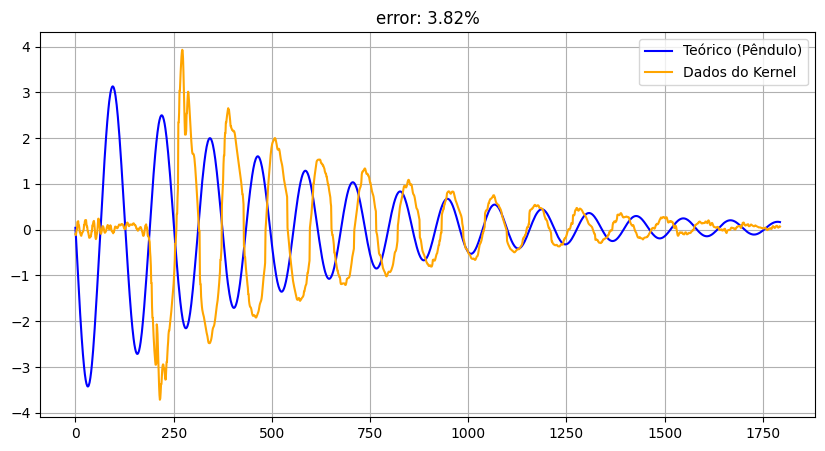

In [ ]:
def normalize(data):
    return np.array(data - np.mean(data))/np.std(data)

def compare(data1, data2, phase=0, plot=False):
    data1 = normalize(data1)
    data2 = normalize(data2)
    score = wasserstein_distance(data1, data2)
    data2 = data2[phase:]

    n_samples = min(len(data1), len(data2))
    samples1 = np.linspace(0, len(data1)-1, n_samples, dtype=int)
    samples2 = np.linspace(0, len(data2)-1, n_samples, dtype=int)

    data1 = data1[samples1]
    data2 = data2[samples2]

    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(data1, color='blue', label='Teórico (Pêndulo)')
        plt.plot(data2, color='orange',  label='Dados do Kernel')
        plt.title(f'error: {score*100:.2f}%')
        plt.legend(), plt.grid()
        plt.show()

    return (data1, data2, score)


result = compare(pendulum.omega, sensor[target], plot=True)

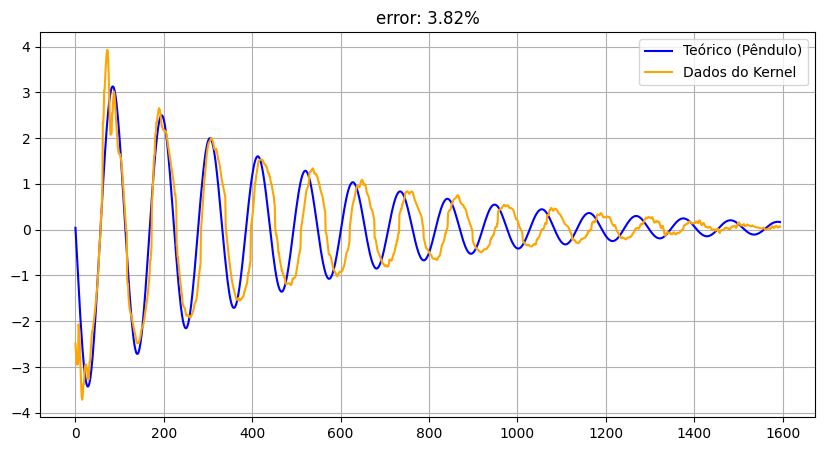

In [ ]:
result = compare(pendulum.omega, sensor[target], plot=True, phase=200)